# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Eric Hahn

Datum: 18.11.2023

Gruppe: 88

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

**Forschungsfrage 1:** Lässt sich der Transportkoeffizient mit den Metadten der Messung herausfinden?

**Forschungsfrage 2:** Lässt sich das Newtonsche Abkühlungsgesetz bestätigen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

In eine mit heißer Flüssigkeit befüllte Tasse wird eineer der Temperatursensoren eingetaucht. 

Der zweite Temperatursensor hängt hier frei in der Luft.

Dieser Aufbau wird so für 10 Minuten so gelassen.

<img src="figures/Newtonversuch.jpg" width="800">

## Versuchsauswertung

In [62]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [63]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

import h5py as h5                                          #h5py importieren
path_h5 = "/home/pi/calorimetry_home/H5Newton/H5Newton.h5"       #Pfad zum h5-File definieren


# DONE #

In [64]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

with h5.File("H5Newton/H5Newton.h5") as f:                       #Einlesen des h5-Files
    raw = f["RawData"]                               #Einlesen der RawData Datei
    sensor_1 = raw["1ee809ee-496a-6c68-b1ac-24925961eec5"]     #öffnen der beiden Sensoren
    sensor_2 = raw["1ee809f4-469b-61f3-b8b0-e35af6ea279e"]
    y_1 = sensor_1["temperature"]                              #speichern der Sensordaten
    x_1 = sensor_1["time"]
    y_2 = sensor_2["temperature"]                              
    x_2 = sensor_2["time"]
    y_1neu = np.array(y_1)                                     #umwandeln in lesbare Dateien
    x_1neu = np.array(x_1)
    y_2neu = np.array(y_2)
    x_2neu = np.array(x_2)

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

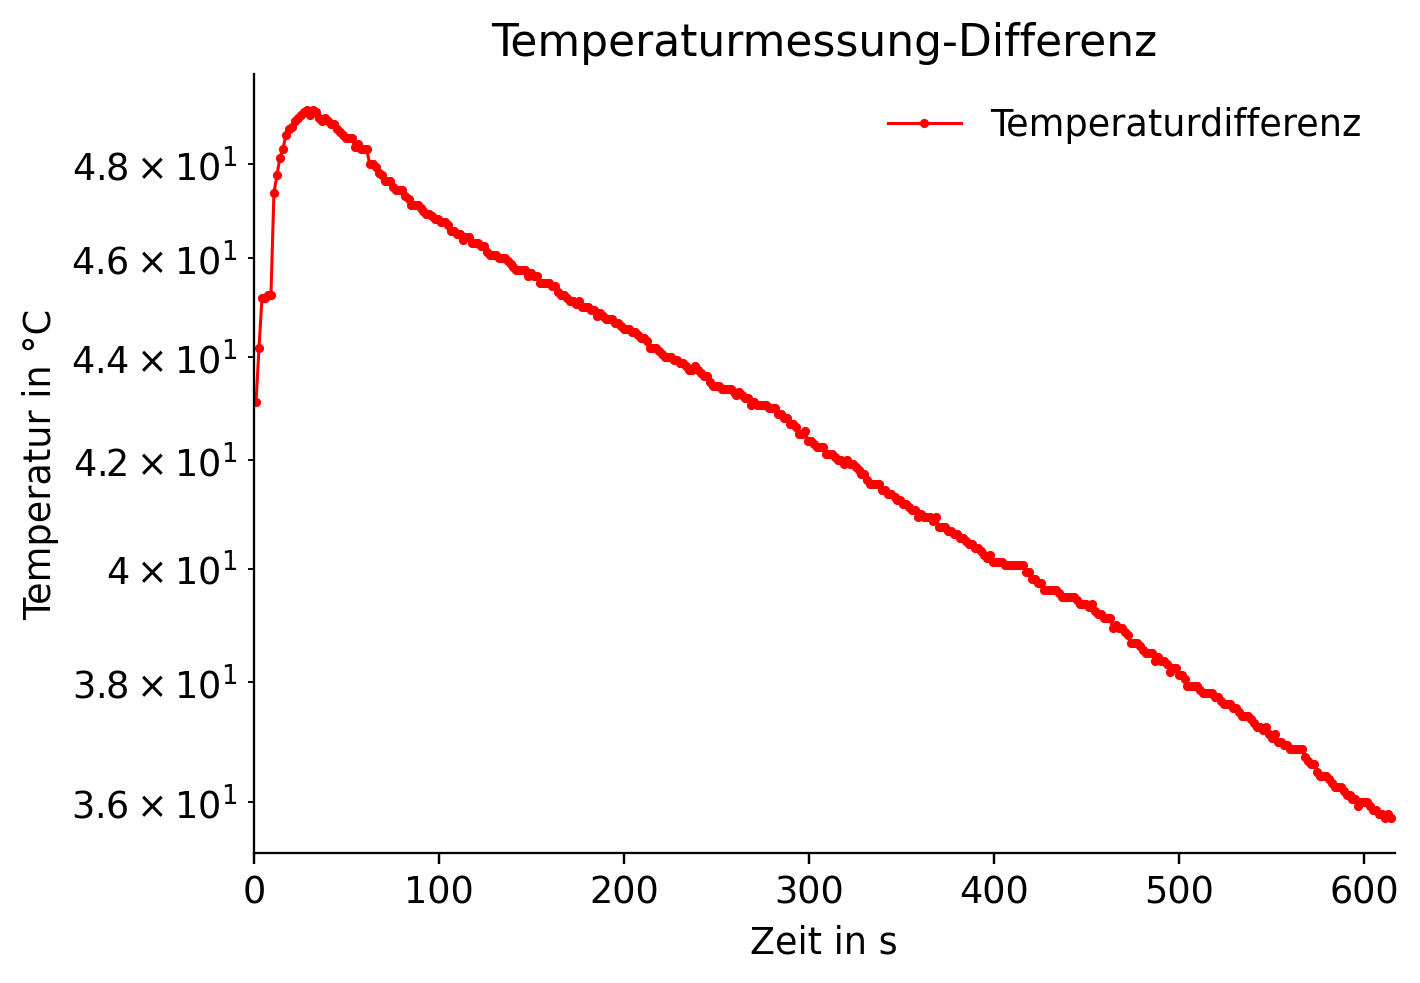

In [65]:
# TODO: Use the temperature and time data for plotting

differenz = []           #leere Liste estellen
for i in list(enumerate(y_2neu)):                       #for-schleife um Differenzen-Liste auszufüllen
    diff = y_1neu[i[0]] - y_2neu[i[0]]
    differenz.append(diff)

plt.plot(x_2neu, differenz, label = "Temperaturdifferenz", color = "r", linewidth = 1, marker = "o", markersize = 2) #plotten

plt.ylabel("Temperatur in °C")                                            #verschönern des Graphen
plt.xlabel("Zeit in s")
plt.title("Temperaturmessung-Differenz")
plt.legend(loc = "upper right")

maxtime = 0                         #Schleife zur Ermittlung der Maximalen Zeit für die Graphgildung
if max(x_1neu) > max(x_2neu):
    maxtime = x_1neu
elif max(x_1neu) == max(x_2neu):
    maxtime = x_1neu
else:
    maxtime = x_2neu
    
plt.xlim(0, max(maxtime)+1)
plt.semilogy()
plt.show()

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [66]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

T_1 = y_1neu[0]                   #Variablen der o.g. Formel definieren
T_2 = y_2neu[0]
t = x_1neu
T = y_1neu
d = T - T_2
K = np.polyfit(t, np.log(d), 0)



# DONE #

#### (iV) Ergebnis

In [67]:
# TODO: Print result

print(K)

# DONE #

[3.7155327]


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Der Transportkoeffizient nimmt mit etwa 3,72 einen plausiblen wert an. Somit hat sich die Forschungsfrage bestätigt.

Des Weiteren lässt sich auch das Newtonsche Abkühlungsgesetz bestätigen. Dies erkennt man daran, dass der Verlauf des Graphen linear ist. Dies bedeutet, dass der Temperturunterschied zwischen dem Körper und seiner Umgebung direkt proportional zum Wärmeverlust eines Körpers ist. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die Programmierung war leider viel (!!!) zu aufwändig für ein 2CP-Fach.

Leider total unangemessen, wodurch der Lerneffekt ziemlich gering ist.

Auch die Aufgabenstellung ist uneindeutig formuliert, teils irreführend und vorallem viel zu unausreichend erläutert. Bis man herausgefunden hat, was erwartet wird, ist viel Zeit verstrichen.

Positiv ist, dass der Graph wenigstens vernünftig aussieht.